Starting SAW Method...


--------------------------------------------------
Criterion 1 (Benefit):
Normalized values: [0.72727273 0.45454545 0.63636364 0.81818182 1.         0.54545455]
--------------------------------------------------

--------------------------------------------------
Criterion 2 (Benefit):
Normalized values: [0.7 0.3 0.5 0.9 1.  0.9]
--------------------------------------------------

--------------------------------------------------
Criterion 3 (Benefit):
Normalized values: [0.28571429 1.         0.85714286 1.         0.42857143 0.71428571]
--------------------------------------------------

--------------------------------------------------
Criterion 4 (Cost):
Normalized values: [1.         0.2        0.25       0.33333333 0.14285714 0.25      ]
--------------------------------------------------

--------------------------------------------------
Weighted decision matrix:
[[0.25454545 0.21       0.02857143 0.25      ]
 [0.15909091 0.09       0.1        0.05     

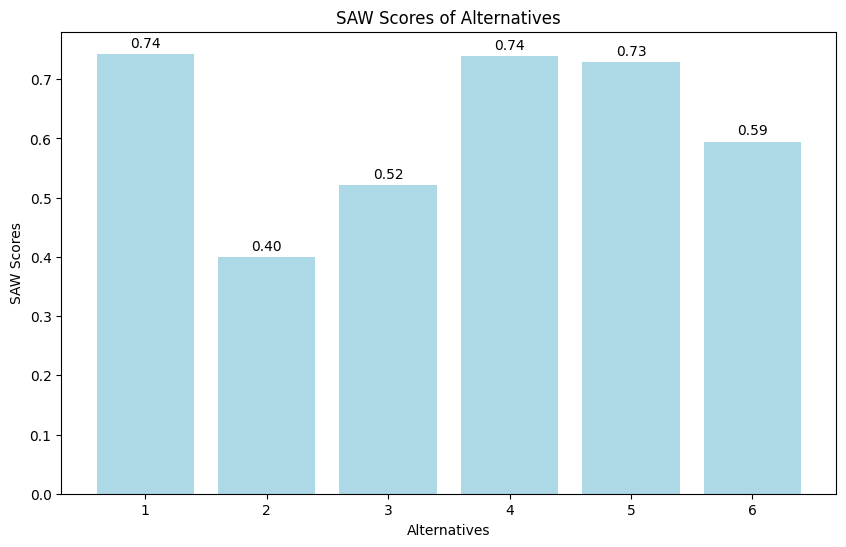

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_matrix_saw(decision_matrix, is_benefit, verbose=False):
    """
    Normalizes the decision matrix for SAW.
    Benefit criteria: Divide by max value.
    Cost criteria: Divide min value by each entry.

    Args:
        decision_matrix (numpy.ndarray): The original decision matrix.
        is_benefit (list): A list of booleans indicating if each criterion is a benefit (True) or cost (False).
        verbose (bool): If True, prints the normalization step.

    Returns:
        numpy.ndarray: The normalized decision matrix.
    """
    num_criteria = decision_matrix.shape[1]
    normalized_matrix = np.zeros_like(decision_matrix, dtype=float)

    for j in range(num_criteria):
        if is_benefit[j]:  # Benefit criterion
            max_val = np.max(decision_matrix[:, j])
            normalized_matrix[:, j] = decision_matrix[:, j] / max_val
        else:  # Cost criterion
            min_val = np.min(decision_matrix[:, j])
            normalized_matrix[:, j] = min_val / decision_matrix[:, j]

        if verbose:
            print(f"\n{'-'*50}")
            print(f"Criterion {j + 1} {'(Benefit)' if is_benefit[j] else '(Cost)'}:")
            print(f"Normalized values: {normalized_matrix[:, j]}")
            print(f"{'-'*50}")

    return normalized_matrix

def apply_weights_saw(normalized_matrix, weights, verbose=False):
    """
    Applies weights to the normalized decision matrix.

    Args:
        normalized_matrix (numpy.ndarray): The normalized decision matrix.
        weights (list): The weights corresponding to each criterion.
        verbose (bool): If True, prints the weighted matrix.

    Returns:
        numpy.ndarray: The weighted decision matrix.
    """
    weighted_matrix = normalized_matrix * weights
    if verbose:
        print(f"\n{'-'*50}")
        print("Weighted decision matrix:")
        print(weighted_matrix)
        print(f"{'-'*50}")
    return weighted_matrix

def calculate_saw_scores(weighted_matrix, verbose=False):
    """
    Calculates the SAW scores by summing up weighted values for each alternative.

    Args:
        weighted_matrix (numpy.ndarray): The weighted decision matrix.
        verbose (bool): If True, prints the scores.

    Returns:
        numpy.ndarray: The total scores for each alternative.
    """
    scores = np.sum(weighted_matrix, axis=1)  # Sum of weighted values across criteria
    if verbose:
        print(f"\n{'-'*50}")
        print("SAW Scores for Alternatives:")
        print(scores)
        print(f"{'-'*50}")
    return scores

def rank_saw(scores):
    """
    Ranks the alternatives based on their SAW scores.

    Args:
        scores (numpy.ndarray): The scores of the alternatives.

    Returns:
        numpy.ndarray: The ranked indices of the alternatives (1st is the best).
    """
    return np.argsort(scores)[::-1]  # Sort scores in descending order

def plot_saw_results(scores):
    """
    Plots the SAW scores of alternatives as a bar chart.

    Args:
        scores (numpy.ndarray): The scores of the alternatives.
    """
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(1, len(scores) + 1), scores, color='lightblue')

    # Annotate each bar with the score
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.03, f"{height:.2f}",
                 ha='center', va='top', fontsize=10, color='black')

    plt.xlabel("Alternatives")
    plt.ylabel("SAW Scores")
    plt.title("SAW Scores of Alternatives")
    plt.xticks(range(1, len(scores) + 1))
    plt.show()

def saw(decision_matrix, weights, is_benefit, verbose=False, plot=True):
    """
    Perform the Simple Additive Weighting (SAW) method for MCDM.

    Args:
        decision_matrix (list of lists): Decision matrix (alternatives x criteria).
        weights (list): Weights for each criterion (should sum to 1).
        is_benefit (list): List indicating which criteria are benefits (True) or costs (False).
        verbose (bool): If True, prints intermediate results.
        plot (bool): If True, generates a plot of the results.

    Prints:
        Final rankings and scores of alternatives.
    """
    print("Starting SAW Method...\n")

    # Convert decision matrix to numpy array
    decision_matrix = np.array(decision_matrix)

    # Normalize the decision matrix
    normalized_matrix = normalize_matrix_saw(decision_matrix, is_benefit, verbose)

    # Apply weights
    weighted_matrix = apply_weights_saw(normalized_matrix, weights, verbose)

    # Calculate scores
    scores = calculate_saw_scores(weighted_matrix, verbose)

    # Rank alternatives
    rankings = rank_saw(scores)

    # Display results
    print("\n" + "="*50)
    print("\n*SAW Results:*")
    print("\nFinal Scores of Alternatives:")
    for i, score in enumerate(scores):
        print(f"Alternative {i + 1}: {score:.4f}")

    print("\nFinal Ranking of Alternatives (Best to Worst):", rankings+1)
    print()
    print("="*50)
    print()

    # Plot results if requested
    if plot:
        plot_saw_results(scores)

# Example Usage:

# Decision matrix with 6 alternatives and 4 criteria
decision_matrix = [[8, 7, 2, 1],
                   [5, 3, 7, 5],
                   [7, 5, 6, 4],
                   [9, 9, 7, 3],
                   [11, 10, 3, 7],
                   [6, 9, 5, 4]]

# Normalized weights for the 4 criteria
weights = [0.35, 0.3, 0.1, 0.25]  # Sum of weights should equal 1

# Define which criteria are benefits (True) or costs (False)
is_benefit = [True, True, True, False]  # 4th criterion is a cost

# Run SAW with verbose output and plot
saw(decision_matrix, weights, is_benefit, verbose=True, plot=True)